<a href="https://colab.research.google.com/github/mrinaldi2/pytorch_nn/blob/master/notebooks/fcc_biking_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

# DataSet

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Data Source :http://data.seoul.go.kr/
SOUTH KOREA PUBLIC HOLIDAYS. URL: publicholidays.go.kr

* Date : year-month-day
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of he day
* Temperature-Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [4]:
dataset_columns = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]

In [15]:
df = pd.read_csv("SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1)
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [17]:
df.columns = dataset_columns
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [18]:
df["functional"] = (df["functional"] == "Yes").astype(int)

In [20]:
df = df[df["hour"] == 12]

In [21]:
df = df.drop(["hour"], axis=1)
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


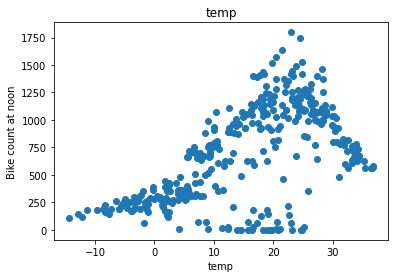

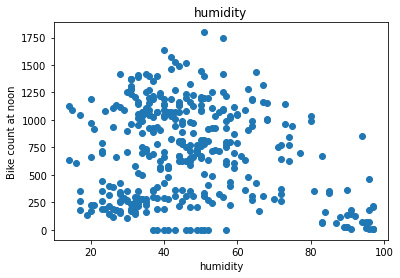

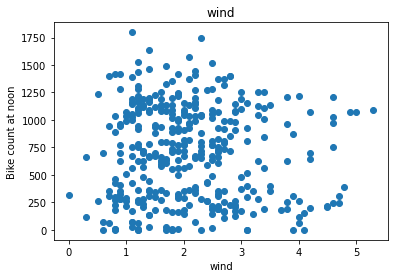

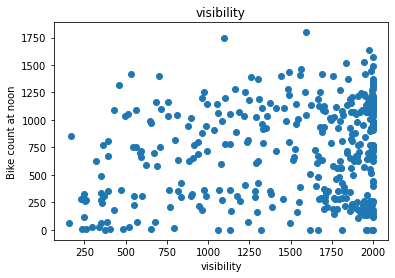

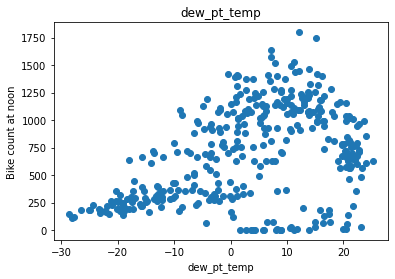

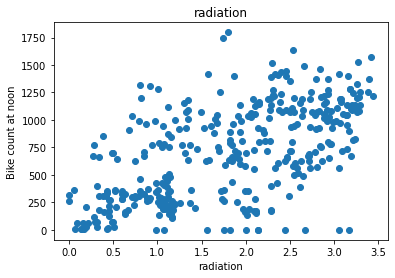

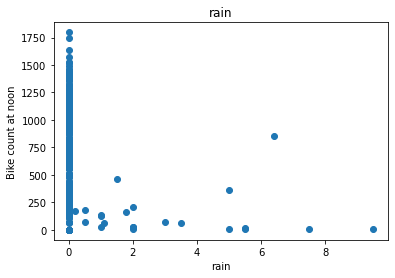

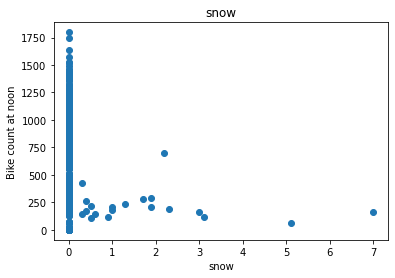

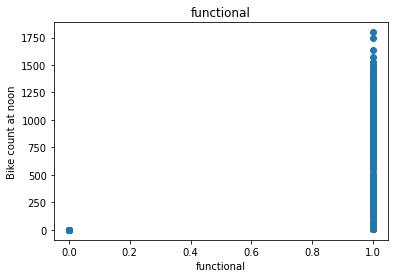

In [24]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike count at noon")
  plt.xlabel(label)
  plt.show()

In [26]:
df = df.drop(["wind", "visibility", "functional"], axis=1)

KeyError: ignored

In [27]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [28]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [39]:
def getxy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.colums if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((X, y))
  return data, X, y

In [35]:
_, X_train_temp, y_train_temp = getxy(train, "bike_count", x_labels=["temp"])
_, X_val_temp, y_val_temp = getxy(val, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = getxy(test, "bike_count", x_labels=["temp"])

In [32]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [33]:
print(temp_reg.coef_, temp_reg.intercept_)

[[21.41485543]] [374.59098114]


In [36]:
print(temp_reg.score(X_test_temp, y_test_temp))

0.39151084923597557


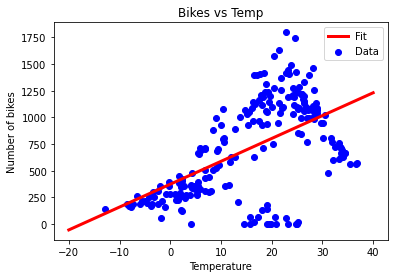

In [37]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temperature")
plt.show()

# Multiple Linear Regression

In [38]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [40]:
_, X_train, y_train = getxy(train, "bike_count", x_labels=df.columns[1:])
_, X_val, y_val = getxy(val, "bike_count", x_labels=df.columns[1:])
_, X_test, y_test = getxy(test, "bike_count", x_labels=df.columns[1:])

In [43]:
all_reg = LinearRegression()
all_reg.fit(X_train, y_train)

LinearRegression()

In [44]:
all_reg.score(X_test, y_test)

0.4034818802151897

# Regression with Neural Net

In [46]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [48]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [51]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss="mean_squared_error")

In [52]:
history = temp_nn_model.fit(X_train_temp, y_train_temp, verbose=0, epochs=1000, validation_data=(X_val_temp, y_val_temp))

In [55]:
def plot_history(history):
  f1, (ax1) = plt.subplots(1,1, figsize=(5,4))
  ax1.plot(history.history['loss'], label="loss")
  ax1.plot(history.history['val_loss'], label="val_loss")
  ax1.set_xlabel("Epoch")
  ax1.set_ylabel("MSE")
  ax1.legend()
  ax1.grid(True)
  plt.show()

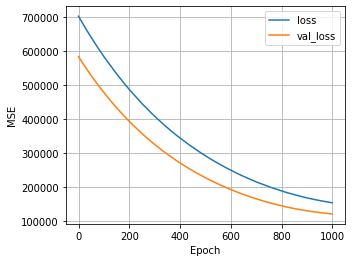

In [56]:
plot_history(history)

4/4 [==============================] - 0s 3ms/step


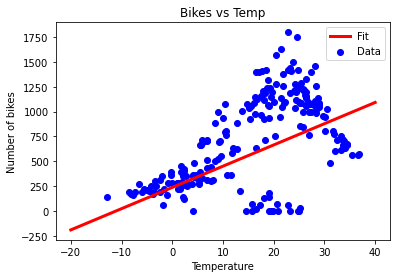

In [57]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temperature")
plt.show()

# Neural Net

In [69]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="mean_squared_error")

In [70]:
history = nn_model.fit(X_train_temp, y_train_temp, verbose=0, epochs=100, validation_data=(X_val_temp, y_val_temp))

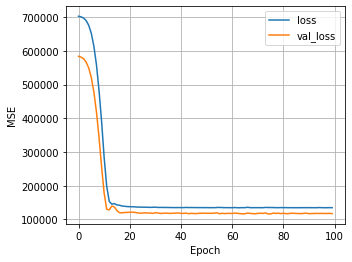

In [71]:
plot_history(history)

4/4 [==============================] - 0s 3ms/step


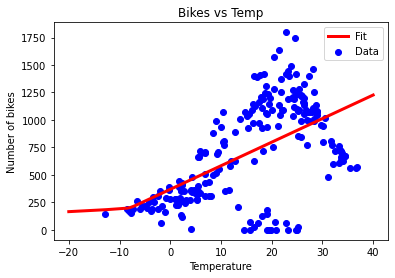

In [72]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temperature")
plt.show()

In [84]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(X_train)

nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="mean_squared_error")

In [85]:
history = nn_model.fit(X_train, y_train, verbose=0, epochs=100, validation_data=(X_val, y_val ))

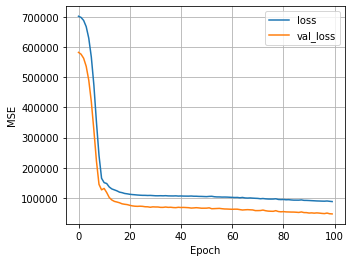

In [86]:
plot_history(history)

In [87]:
#calculate the MSE for both linear reg and nn
y_pred_reg = all_reg.predict(X_test)
y_pred_nn = nn_model.predict(X_test)

3/3 [==============================] - 0s 6ms/step


In [81]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [89]:
MSE(y_pred_reg, y_test)

95863.95834782202

In [88]:
MSE(y_pred_nn, y_test)

71449.82664303492

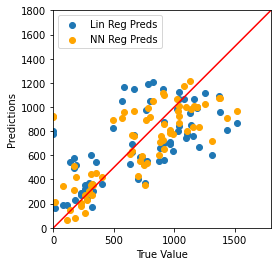

In [94]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test, y_pred_reg, label="Lin Reg Preds")
plt.scatter(y_test, y_pred_nn, label="NN Reg Preds", color="Orange")
plt.xlabel("True Value")
plt.ylabel("Predictions")
plt.legend()
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims, c="red")